In [4]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
data = pd.read_csv("../../day3-ecommerce-pandas-analysis-customer-segmentation/data/online_retail_clean.csv")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12


In [23]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
805544,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
805545,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
805546,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
805547,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011,12


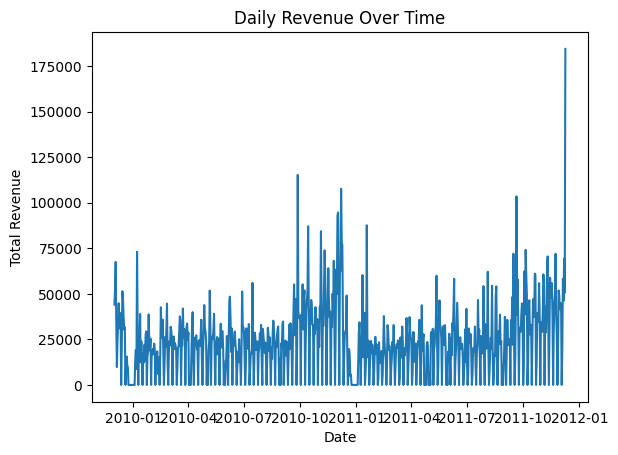

,InvoiceDate,Total Price
11,2009-12-12,0.00
18,2009-12-19,0.00
23,2009-12-24,0.00
24,2009-12-25,0.00
25,2009-12-26,0.00
...,...,...
704,2011-11-05,0.00
711,2011-11-12,0.00
718,2011-11-19,0.00
725,2011-11-26,0.00


In [41]:
daily_revenue = (
    data
    .set_index("InvoiceDate")
    .resample("D")["Total Price"]
    .sum()
    .reset_index()
)

fig, ax = plt.subplots()
ax.plot(daily_revenue["InvoiceDate"], daily_revenue["Total Price"])

ax.set_title("Daily Revenue Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Total Revenue")

plt.show()


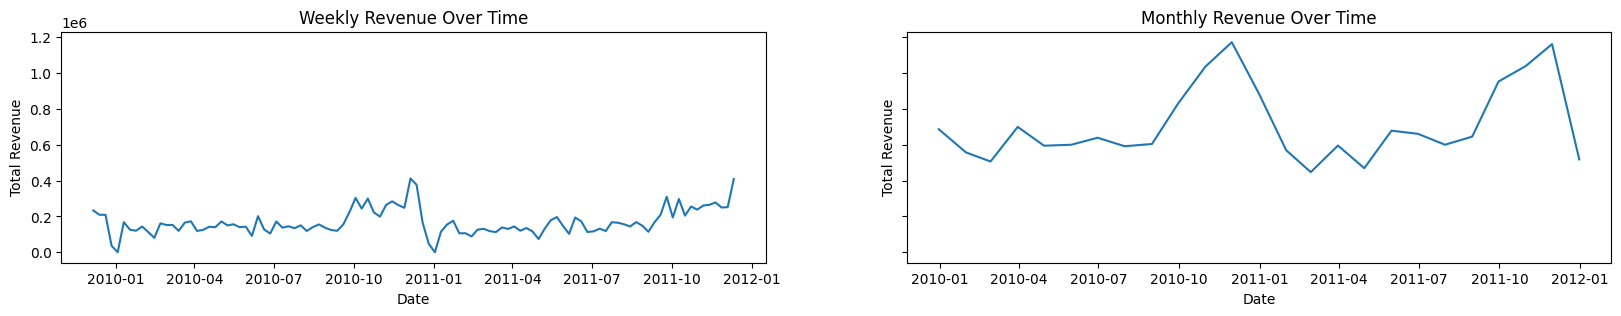

In [57]:
weekly_revenue = (
    data.set_index("InvoiceDate")
    .resample("W")["Total Price"]
    .sum()
    .reset_index()
)

monthly_revenue = (
    data.set_index("InvoiceDate")
    .resample("ME")["Total Price"]
    .sum()
    .reset_index()
)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 3), sharey=True)

ax1.plot(weekly_revenue["InvoiceDate"], weekly_revenue["Total Price"])
ax1.set_title("Weekly Revenue Over Time")
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Revenue')

ax2.plot(monthly_revenue["InvoiceDate"], monthly_revenue["Total Price"])
ax2.set_title("Monthly Revenue Over Time")
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Revenue')

plt.show()

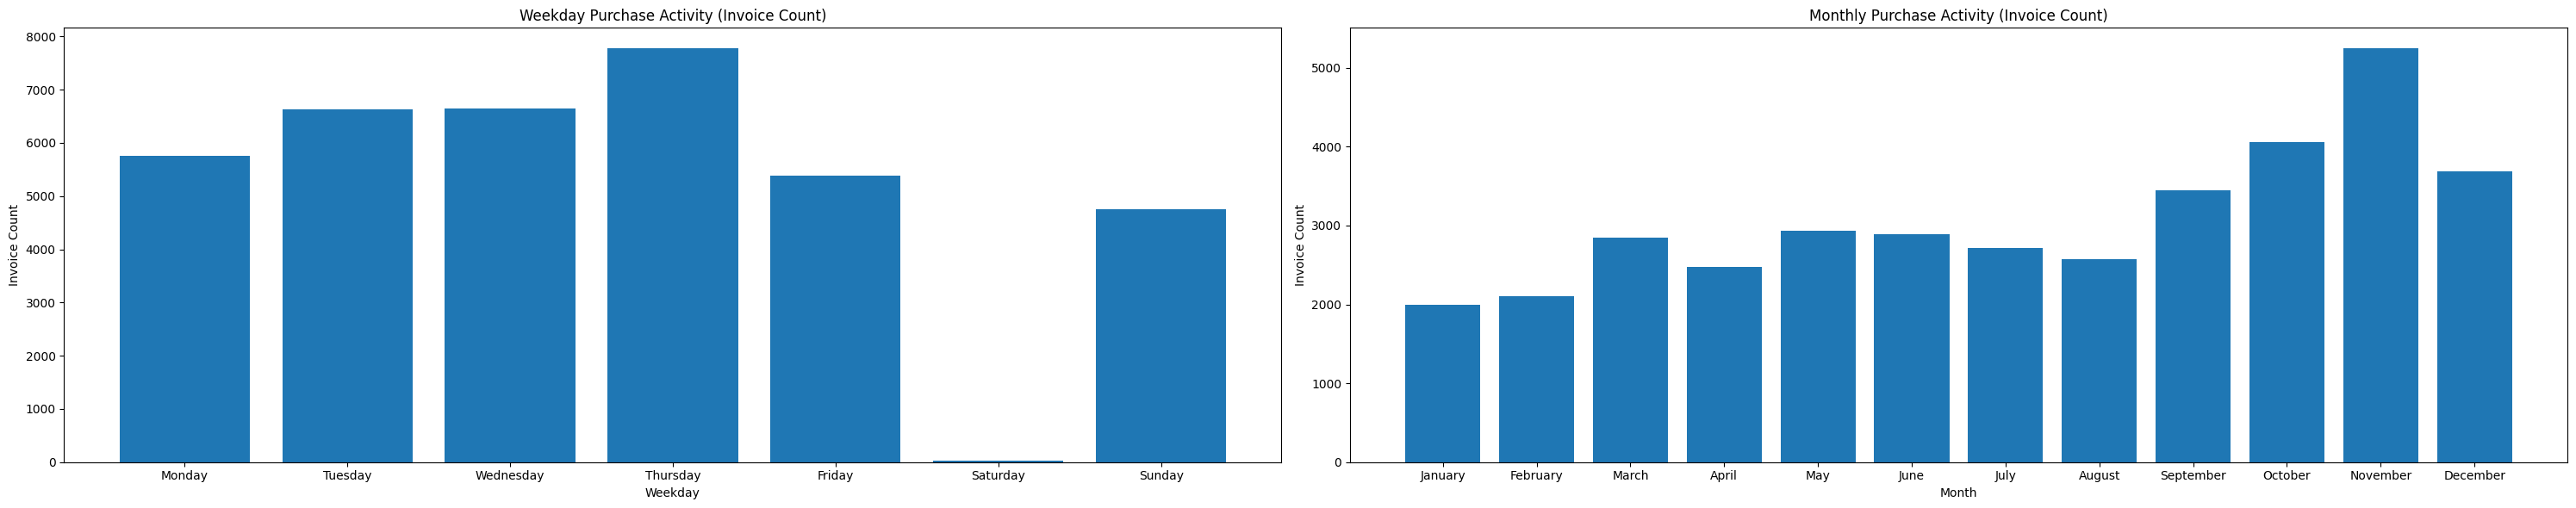

In [108]:
# Feature extraction
data["Week Day"] = data["InvoiceDate"].dt.day_name()
data["Month Name"] = data["InvoiceDate"].dt.month_name()

# ---------- WEEKDAY ----------
weekday_invoices = (
    data
    .groupby("Week Day")["Invoice"]
    .nunique()
    .reset_index(name="Invoice Count")
)

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

weekday_invoices["Week Day"] = pd.Categorical(
    weekday_invoices["Week Day"],
    categories=weekday_order,
    ordered=True
)

weekday_invoices = weekday_invoices.sort_values("Week Day")

# ---------- MONTH ----------
monthly_invoices = (
    data
    .groupby("Month Name")["Invoice"]
    .nunique()
    .reset_index(name="Invoice Count")
)

month_order = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

monthly_invoices["Month Name"] = pd.Categorical(
    monthly_invoices["Month Name"],
    categories=month_order,
    ordered=True
)

monthly_invoices = monthly_invoices.sort_values("Month Name")

# ---------- VISUAL ----------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 6))

ax1.bar(weekday_invoices["Week Day"], weekday_invoices["Invoice Count"])
ax1.set_title("Weekday Purchase Activity (Invoice Count)")
ax1.set_xlabel("Weekday")
ax1.set_ylabel("Invoice Count")

ax2.bar(monthly_invoices["Month Name"], monthly_invoices["Invoice Count"])
ax2.set_title("Monthly Purchase Activity (Invoice Count)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Invoice Count")

plt.tight_layout()
plt.show()


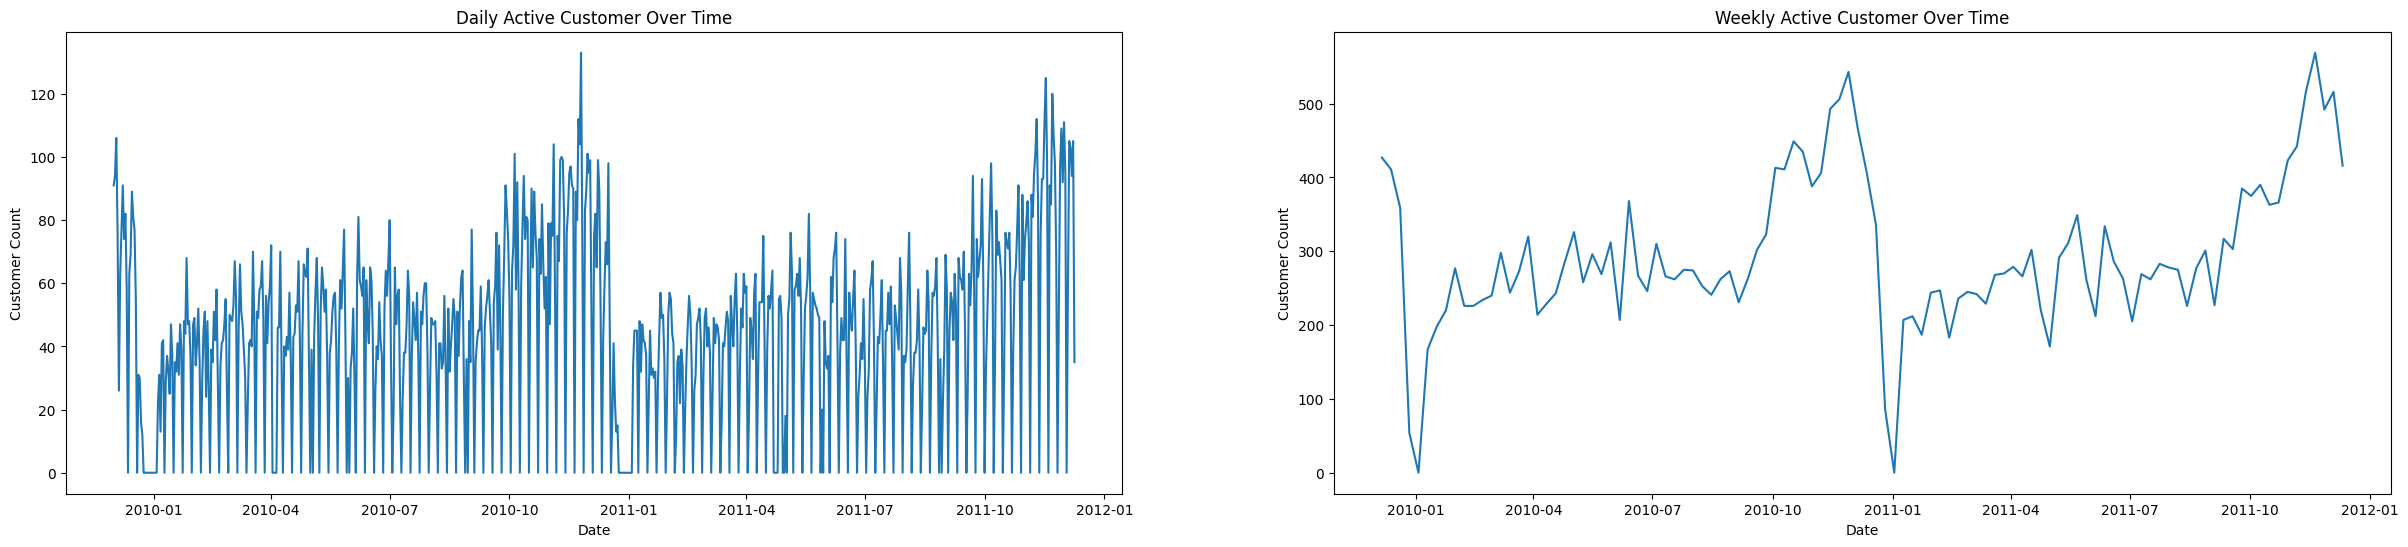

In [115]:
data_ts = data.set_index("InvoiceDate")

active_customers_daily = (
    data_ts
    .resample("D")["Customer ID"]
    .nunique()
    .reset_index()
)
active_customers_weekly = (
    data_ts
    .resample("W")["Customer ID"]
    .nunique()
    .reset_index()
)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(30, 6))

ax1.plot(active_customers_daily["InvoiceDate"], active_customers_daily["Customer ID"])
ax1.set_title("Daily Active Customer Over Time")
ax1.set_xlabel('Date')
ax1.set_ylabel('Customer Count')

ax2.plot(active_customers_weekly["InvoiceDate"], active_customers_weekly["Customer ID"])
ax2.set_title("Weekly Active Customer Over Time")
ax2.set_xlabel('Date')
ax2.set_ylabel('Customer Count')

plt.show()

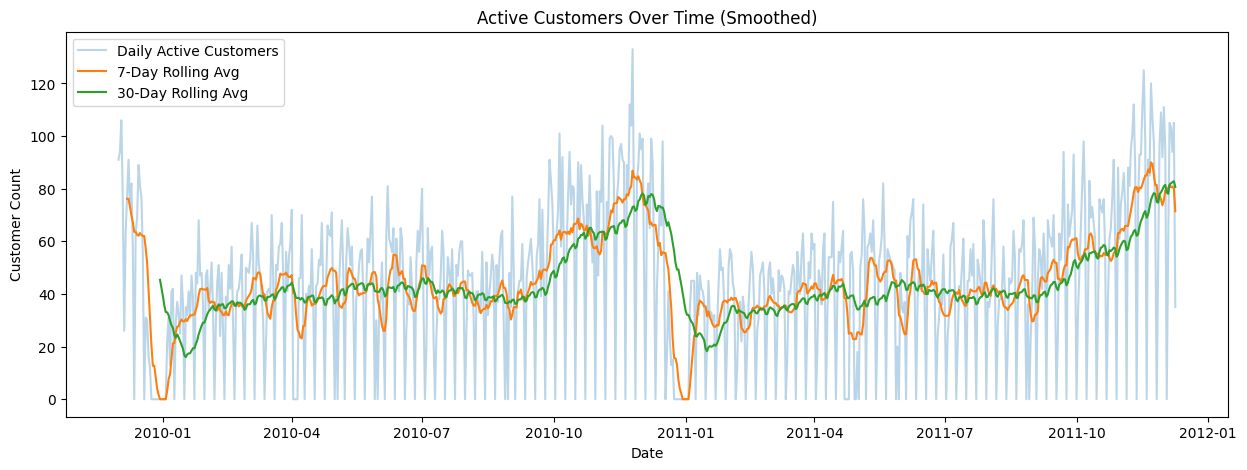

In [123]:
data_ts = data.set_index("InvoiceDate")

active_customers_daily = (
    data_ts
    .resample("D")["Customer ID"]
    .nunique()
    .reset_index()
)
active_customers_weekly = (
    data_ts
    .resample("W")["Customer ID"]
    .nunique()
    .reset_index()
)

active_customers_daily["Rolling_7D"] = active_customers_daily["Customer ID"].rolling(window=7).mean()

active_customers_daily["Rolling_30D"] = active_customers_daily["Customer ID"].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(
    active_customers_daily["InvoiceDate"],
    active_customers_daily["Customer ID"],
    alpha=0.3,
    label="Daily Active Customers"
)

ax.plot(
    active_customers_daily["InvoiceDate"],
    active_customers_daily["Rolling_7D"],
    label="7-Day Rolling Avg"
)

ax.plot(
    active_customers_daily["InvoiceDate"],
    active_customers_daily["Rolling_30D"],
    label="30-Day Rolling Avg"
)

ax.set_title("Active Customers Over Time (Smoothed)")
ax.set_xlabel("Date")
ax.set_ylabel("Customer Count")
ax.legend()

plt.show()